In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm #barra de progreso`
import cv2
from glob import glob

#para redimencionar
import sklearn
import skimage
from skimage.transform import resize

import random
#Usaremos datetime para nombrar archivos
import datetime

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray

import seaborn as sns

print(tf.__version__)


2.20.0


In [22]:
train_dir = "C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/chest_xray/train/"
test_dir =  "C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/chest_xray/test/"

In [23]:
LOAD_FROM_IMAGES = False

def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['NORMAL']:
                label = 0
            elif folderName in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150, 150, 3),mode='constant',anti_aliasing=True)
                    img_file = rgb2gray(img_file)
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y


if LOAD_FROM_IMAGES:
    #cargamos las imágenes a los arrays
    X_train, y_train = get_data(train_dir)
    X_test, y_test= get_data(test_dir)
    
    #grabamos los arrays en archivos
    np.save('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/xtrain.npy', X_train)
    np.save('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/ytrain.npy', y_train)
    np.save('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/xtest.npy', X_test)
    np.save('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/ytest.npy', y_test)
else:
    #cargamos los arrays anteriormente grabados
    X_train = np.load('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/xtrain.npy')
    y_train = np.load('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/ytrain.npy')
    X_test = np.load('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/xtest.npy')
    y_test = np.load('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/ytest.npy')



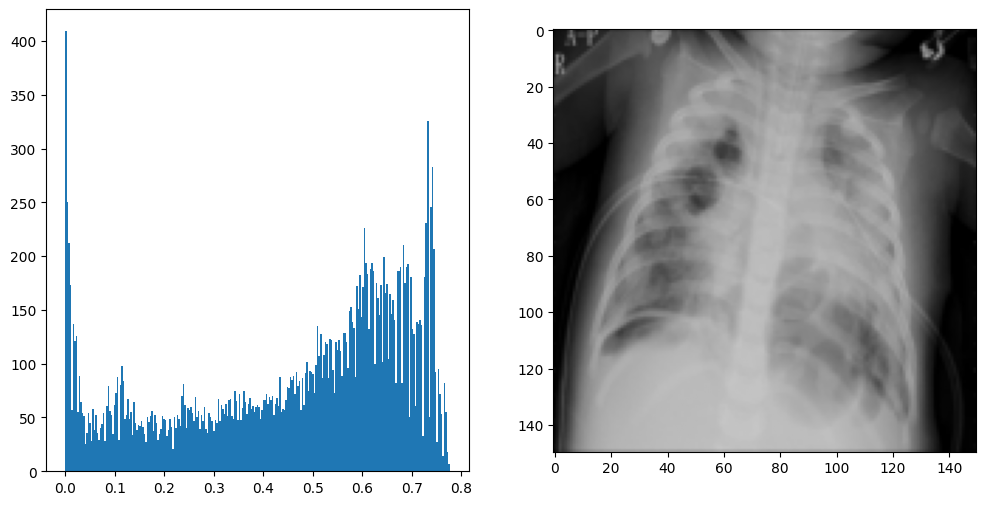

In [24]:
def plotHistogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.hist(a.ravel(), bins=255)
    plt.subplot(1, 2, 2)
    plt.imshow(a, cmap='gray', vmin=0, vmax=1)
    plt.show()
    
plotHistogram(X_train[3])

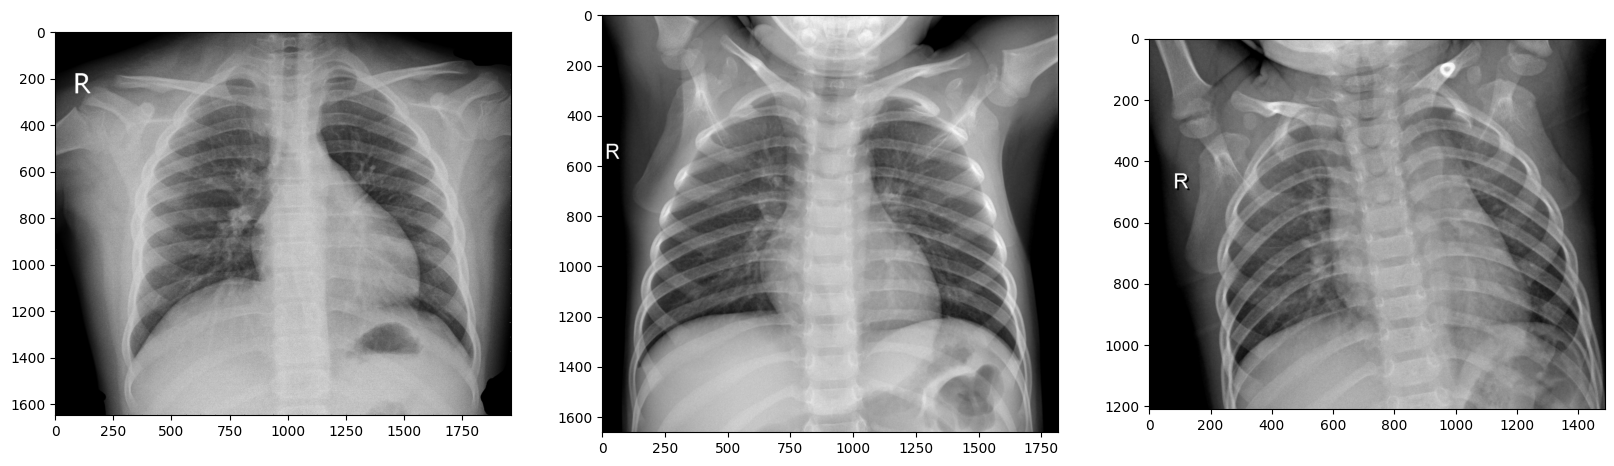

In [25]:
multipleImages = glob('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/chest_xray/train/NORMAL/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
plotThreeImages(multipleImages)

No Neumonía


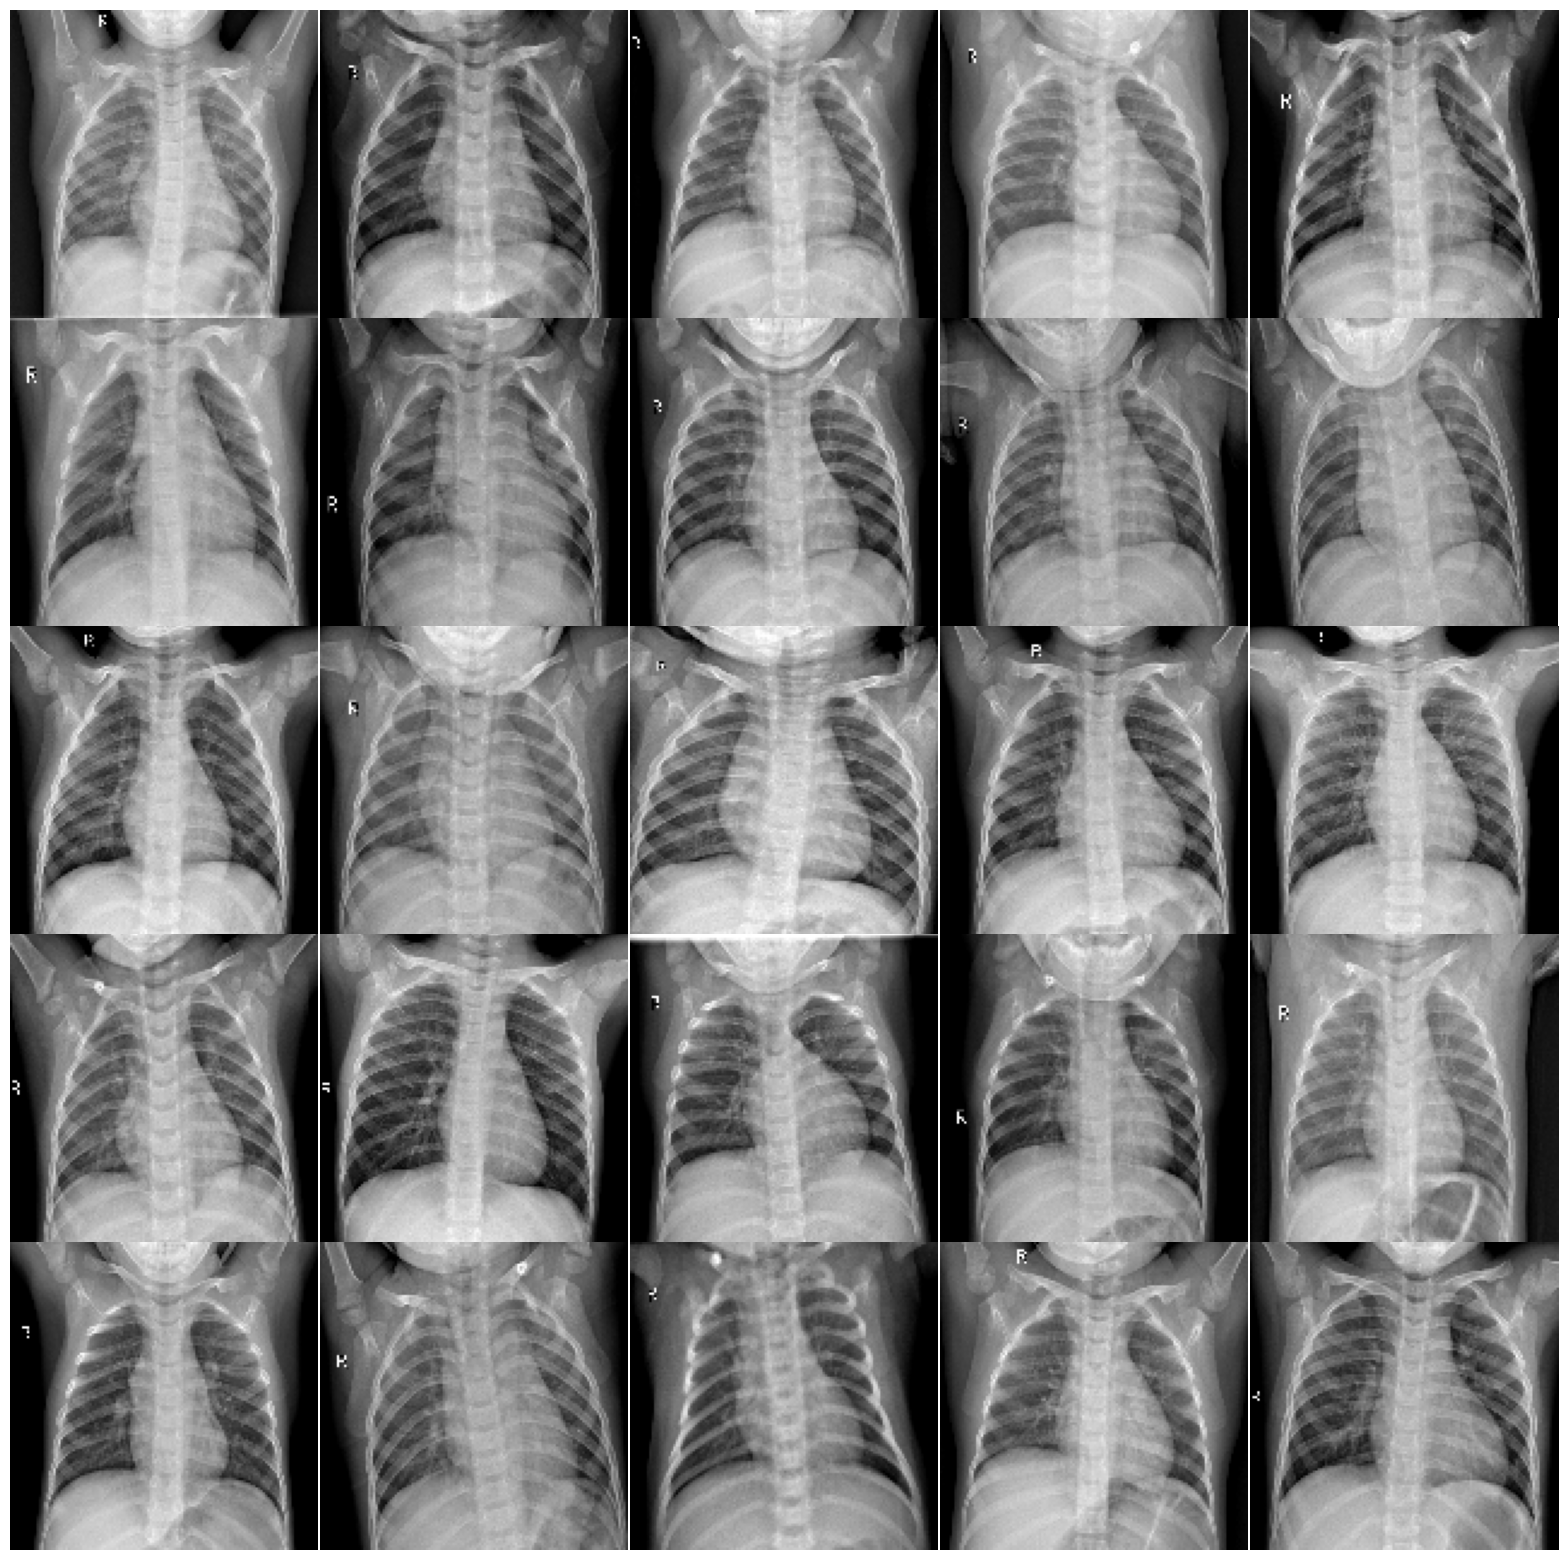

In [26]:
print("No Neumonía")
multipleImages = glob('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/chest_xray/train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

Si neumonía


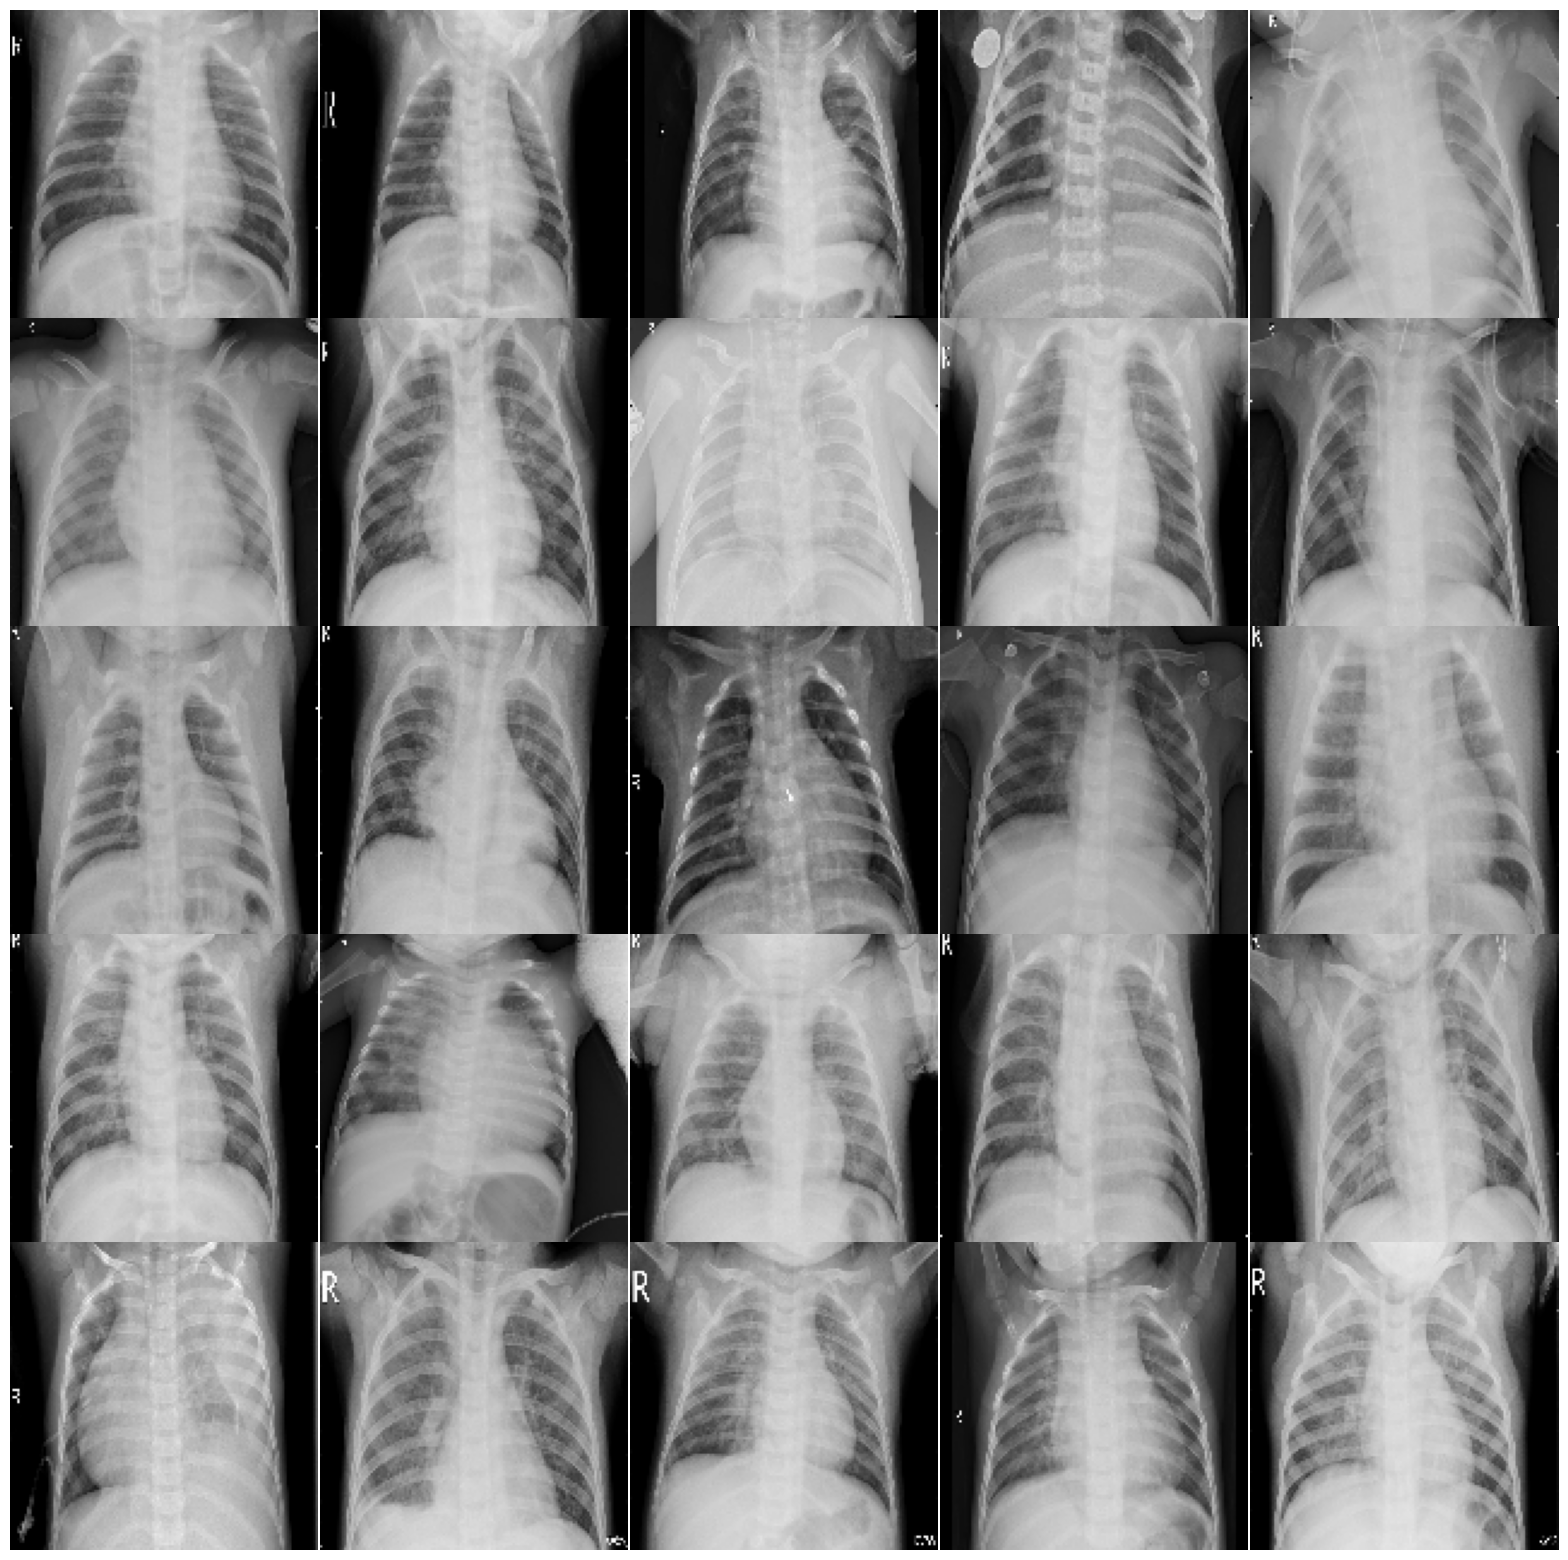

In [27]:
print("Si neumonía")
multipleImages = glob('C:/Users/jesus/IA/machinelearning/machinelearningbook/archivos/chest_xray/train/PNEUMONIA/**')
i_ = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [30]:
y_train

array([1, 1, 1, ..., 0, 0, 0], shape=(2682,))

{0: 'No Neumonía', 1: 'Si Neumonía'}


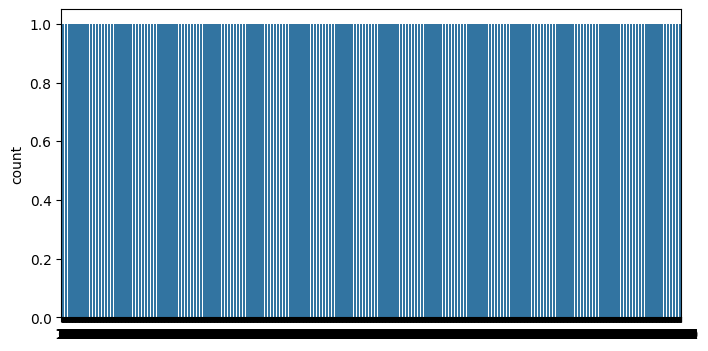

In [32]:
plt.figure(figsize=(8,4))
map_characters = {0: 'No Neumonía', 1: 'Si Neumonía'}
dict_characters=map_characters
map_characters
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [33]:

X_trainReshaped = X_train.reshape(len(X_train),150,150,1)
X_testReshaped = X_test.reshape(len(X_test),150,150,1)

In [34]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

C:\Users\jesus\anaconda3\envs\CursosMachineLearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,033,218 (3.94 MB)

 Trainable params: 1,033,218 (3.94 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(X_trainReshaped, 
          y_train, 
          epochs=20,
          validation_data = (X_testReshaped,y_test),
          callbacks=[tensorboard_callback])

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 201ms/step - accuracy: 0.7189 - loss: 0.4987 - val_accuracy: 0.8349 - val_loss: 0.3723
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.9198 - loss: 0.2095 - val_accuracy: 0.6827 - val_loss: 0.8771
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - accuracy: 0.9441 - loss: 0.1474 - val_accuracy: 0.7708 - val_loss: 0.7118
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 16s 194ms/step - accuracy: 0.9433 - loss: 0.1481 - val_accuracy: 0.7468 - val_loss: 0.9118
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.9620 - loss: 0.0973 - val_accuracy: 0.8109 - val_loss: 0.5570
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 18s 209ms/step - accuracy: 0.9657 - loss: 0.0931 - val_accuracy: 0.7564 - val_loss: 1.0303
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 205ms/step - accuracy: 0.9694 - loss: 0.0837 - val_accuracy: 0.7484 - val_loss: 1.0262
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.9683 - loss: 0.0860 - val_accu

In [36]:
test_loss, test_acc = model.evaluate(X_testReshaped, y_test)
print(test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7115 - loss: 3.3994
0.7115384340286255


In [37]:
test_loss, test_acc = model.evaluate(X_trainReshaped, y_train)

84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9638 - loss: 0.1083
